# Problem Statement

We will be predicting the Attrition whether the particular employee will leave or stay in the company depending on the attributes provide in the dataset.
Since, the target variable has binary data, will use logistic model for the prediction.

In [2]:
import pandas as pd

df=pd.read_csv('HR_Employee_Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# EDA

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.isnull().values.any()

False

There is no Null values present.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are total 9 columns which has object datatypes which needs to be converted

In [8]:
#encoding

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
list=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

In [9]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

Here, 1 denoted Yes while 0 denotes No

In [10]:
df['Department'].unique()

array([2, 1, 0])

In [11]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

# Statistical Summary

In [12]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Key Observation:
    1. All the columns have same count value which is 1470, hence we can ascertain that there is no Null value present in the data.
    2. There could be outliers presnece in Age, DailyRate,DistanceFrom Home, TotalWorking Years,YearsAtCompany etc.
    3. Standard Hours and Employee count has same value for all the employee and hence may not affecting our target-Attrition.

In [94]:
#printing the object data types and their unique value counts

for column in df.columns:
    if df[column].dtype==object:
        print(str(column) +' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('***********************************************')
        print('\n')

In [14]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

1. There are skewness present in the data.
2. here, we are keeping threshold value as +/-0.65 for skewness.
3. Hence, skewness is present in various columns like DistanceFromHome, OverTime, PercentSalaryHike, PerformanceRating, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole,YearsSinceLastPromotion, YearsWithCurrManager.    

In [15]:
#We can use visualization for better underrstanding of the above

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

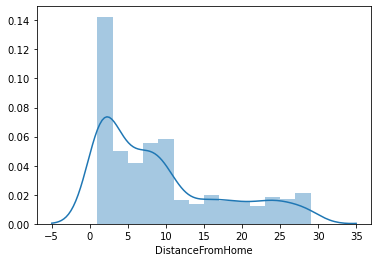

In [17]:
sns.distplot(df['DistanceFromHome'])

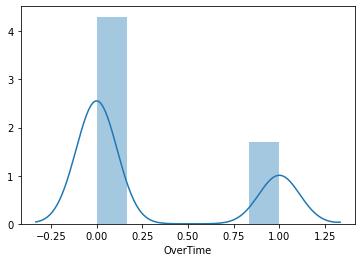

In [18]:
sns.distplot(df['OverTime'])

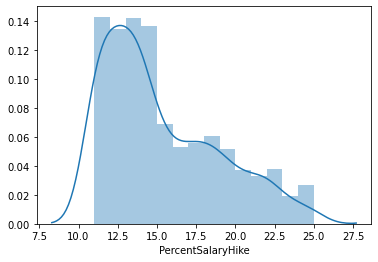

In [19]:
sns.distplot(df['PercentSalaryHike'])

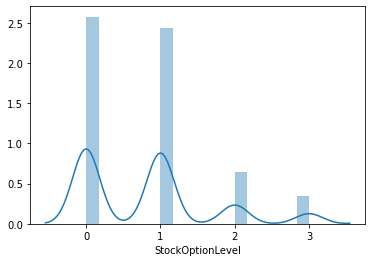

In [20]:
sns.distplot(df['StockOptionLevel'])

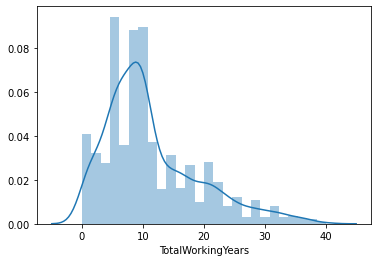

In [21]:
sns.distplot(df['TotalWorkingYears'])

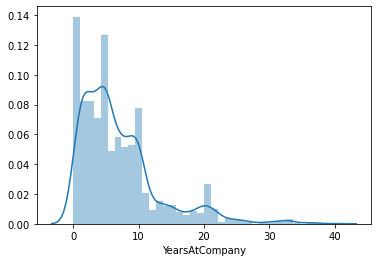

In [22]:
sns.distplot(df['YearsAtCompany'])

From above graphs, we can observe that the data is normalized and hence we need to treat the skewness.

In [23]:
#Checking Outliers using boxplot
# From above describe method we have already checked that there are outliers present.

In [24]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

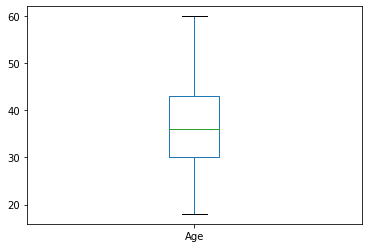

In [25]:
df['Age'].plot.box()

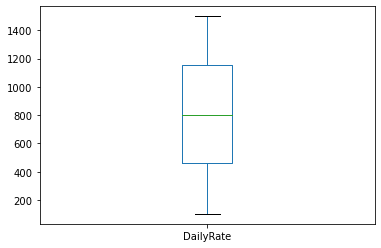

In [26]:
df['DailyRate'].plot.box()

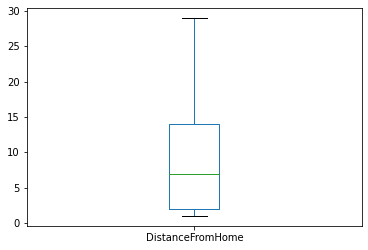

In [27]:
df['DistanceFromHome'].plot.box()

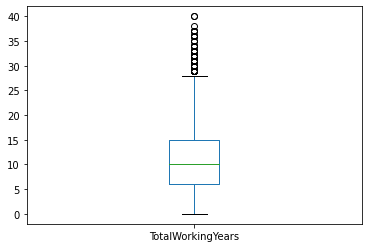

In [28]:
df['TotalWorkingYears'].plot.box()

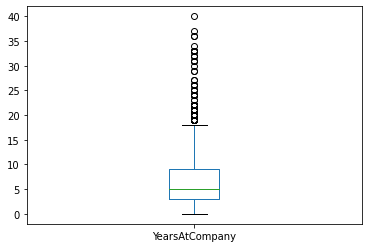

In [29]:
df['YearsAtCompany'].plot.box()

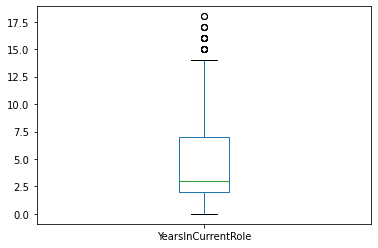

In [30]:
df['YearsInCurrentRole'].plot.box()

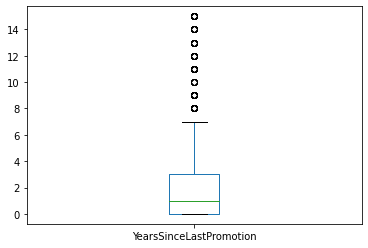

In [31]:
df['YearsSinceLastPromotion'].plot.box()

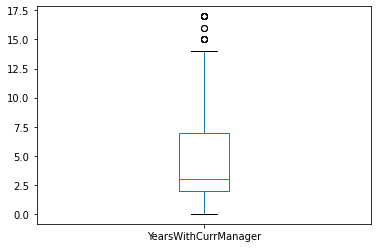

In [32]:
df['YearsWithCurrManager'].plot.box()

1. From above, it can be seen that variables like YearsAtCompany, YearsSinceLastPromotion and TotalWorkingYears has huge no of outliers.
2. Others like YearsWithCurrManager and YearsInCurrentRole ahs very less no of outliers.

In [33]:
#Now, lets check the correlation between all the columns to know which columns are most useful and non useful for analysis.

In [34]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


In [35]:
df[ 'Over18']

0       0
1       0
2       0
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Over18, Length: 1470, dtype: int32

In [36]:
#dropping not useful column as all these columns has single and Nan values which does not affect our target values
df.drop(['EmployeeCount', 'Over18','StandardHours' ], axis=1, inplace=True)

In [37]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,-0.010145,0.010146,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.010577,-0.103369,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,-0.015578,0.004174,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,-0.050990,0.018355,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.010895,-0.019395,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,0.032916,-0.016075,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,0.042070,-0.027128,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,-0.002516,0.043163,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,1.000000,0.017621,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,0.017621,1.000000,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999


From above, we can observed the correlation is distributed among the columns and hence cannot remove the data which has weak correlation also.
But can remove the columns which has no correlation at all and have outliers in them like Business TRavel(0.000074), DailyRate(0.05), MonthlyRate(-0.006), PerformanceRating(0.002),YearsSinceLastPromotion(-0.033)(have Outliers also)  

In [38]:
df.drop(['BusinessTravel', 'DailyRate','YearsSinceLastPromotion','EmployeeNumber', 'MonthlyRate'], axis=1, inplace=True)

In [39]:
#Univariate Analysis

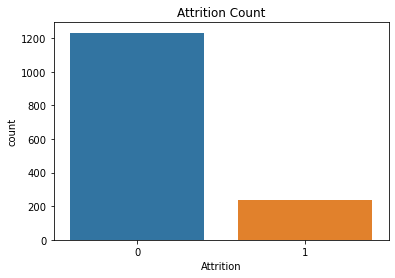

0    1233
1     237
Name: Attrition, dtype: int64


In [40]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Count')
plt.show()

print(df.Attrition.value_counts())

It can be observed, 237 employee has left the company.

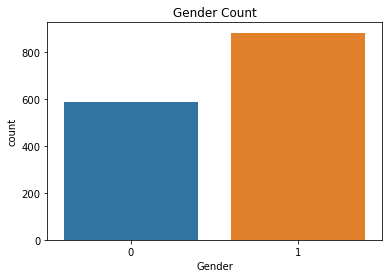

1    882
0    588
Name: Gender, dtype: int64


In [41]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Count')
plt.show()

print(df.Gender.value_counts())

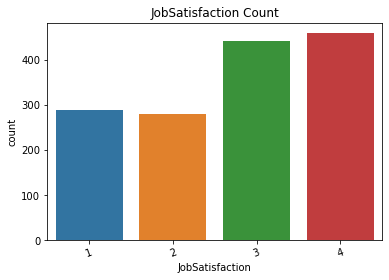

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


In [42]:
plt.subplots(figsize=(6,4))
sns.countplot(x='JobSatisfaction', data=df)
plt.title('JobSatisfaction Count')
plt.xticks(rotation=20)
plt.show()

print(df.JobSatisfaction.value_counts())

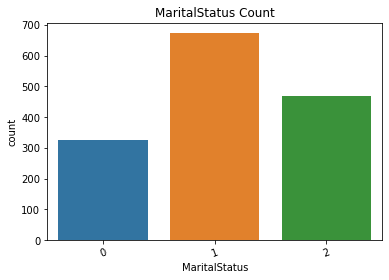

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64


In [43]:
plt.subplots(figsize=(6,4))
sns.countplot(x='MaritalStatus', data=df)
plt.title('MaritalStatus Count')
plt.xticks(rotation=20)
plt.show()

print(df.MaritalStatus.value_counts())

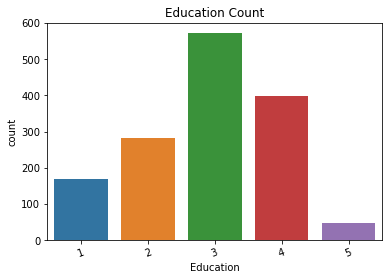

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


In [44]:
plt.subplots(figsize=(6,4))
sns.countplot(x='Education', data=df)
plt.title('Education Count')
plt.xticks(rotation=20)
plt.show()

print(df.Education.value_counts())

In [46]:
#Bivariate Analysis

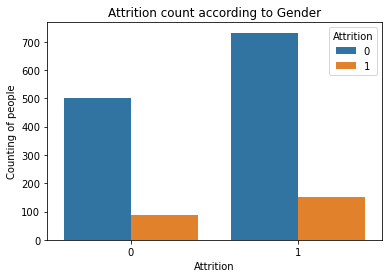

Gender  Attrition
0       0            501
        1             87
1       0            732
        1            150
Name: Attrition, dtype: int64


In [47]:
#Checking Attrition Genderwise
sns.countplot(x='Gender',hue='Attrition',data=df)
plt.title('Attrition count according to Gender')
plt.xlabel('Attrition')
plt.ylabel('Counting of people')
plt.show()

print(df.groupby('Gender')['Attrition'].value_counts())

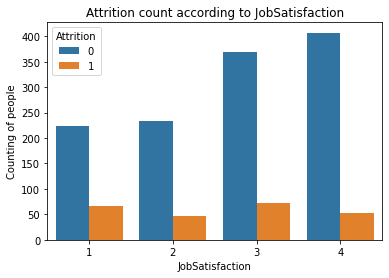

JobSatisfaction  Attrition
1                0            223
                 1             66
2                0            234
                 1             46
3                0            369
                 1             73
4                0            407
                 1             52
Name: Attrition, dtype: int64


In [48]:
#Checking Attrition on the basis of JobSatisfaction
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)
plt.title('Attrition count according to JobSatisfaction')
plt.xlabel('JobSatisfaction')
plt.ylabel('Counting of people')
plt.show()

print(df.groupby('JobSatisfaction')['Attrition'].value_counts())

# Data Pre-processing

In [50]:
#removing outliers using zscore method

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]

In [51]:
df.shape

(1470, 27)

In [52]:
new_df.shape

(1412, 27)

In [53]:
Percentage_loss=((1517-1436)/1517)*100
Percentage_loss

5.339485827290705

Not much data loss is there

In [54]:
# defining the x & y
x=new_df.drop('Attrition',axis=1)
y=new_df['Attrition']

In [55]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1412, dtype: int32

In [78]:
#Now, removing skewness from the x variables only
from sklearn.preprocessing import power_transform

x=power_transform(x, method='yeo-johnson')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [79]:
print(x.shape, '\t\t', y.shape)

(1412, 26) 		 (1412,)


# Model Building

In [80]:
#Scaling x variables

In [81]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [82]:
#Since the outcome has only 2 variable will use binary classification model

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
lr=LogisticRegression()

In [85]:
#Finding best random_state

In [86]:
for i in range(20,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= .30, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:",i)
        print("Training accu score is:", accuracy_score(y_train,pred_train)*100)
        print("Testing accu score is:", accuracy_score(y_test,pred_test)*100)
        print('\n')

At random state 51 The model performs very well
At random state: 51
Training accu score is: 87.95546558704453
Testing accu score is: 87.97169811320755


At random state 110 The model performs very well
At random state: 110
Training accu score is: 87.65182186234817
Testing accu score is: 87.73584905660378


At random state 174 The model performs very well
At random state: 174
Training accu score is: 87.34817813765183
Testing accu score is: 87.26415094339622


At random state 277 The model performs very well
At random state: 277
Training accu score is: 87.95546558704453
Testing accu score is: 87.97169811320755


At random state 369 The model performs very well
At random state: 369
Training accu score is: 87.65182186234817
Testing accu score is: 87.73584905660378


At random state 432 The model performs very well
At random state: 432
Training accu score is: 87.34817813765183
Testing accu score is: 87.26415094339622


At random state 467 The model performs very well
At random state: 467
Tr

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= .30, random_state=689)

In [88]:
print(accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

0.7735849056603774
[[323  32]
 [ 64   5]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       355
           1       0.14      0.07      0.09        69

    accuracy                           0.77       424
   macro avg       0.48      0.49      0.48       424
weighted avg       0.72      0.77      0.74       424



In [71]:
#checking cross val score

In [89]:
from sklearn.model_selection import cross_val_score
cvs= cross_val_score(lr,x,y,cv=4).mean()
print('The CV score is:',cvs, '\nThe accuracy score is:',accuracy_score(y_test,pred_test))

The CV score is: 0.8696883852691218 
The accuracy score is: 0.7735849056603774


# AUC ROC Curve

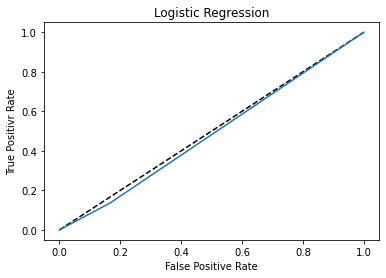

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve (pred_test, y_test)

plt.plot ([0,1],[0,1], 'k--')
plt.plot(fpr,tpr, label='logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positivr Rate')
plt.title('Logistic Regression')
plt.show()

# Model Saving

In [92]:
import pickle
filename= 'HR_Analytics.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [93]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))

df_con2=pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_con2

,original,predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
419,0,0
420,0,0
421,0,0
422,0,0


There are some error in the prediction but model is giving good accuracy